# 課題2: 階調数と疑似輪郭
2階調、4階調、8階調の画像を生成せよ。

原画像として、課題1で使用した画像をグレースケール化した画像（図1）を使用する。

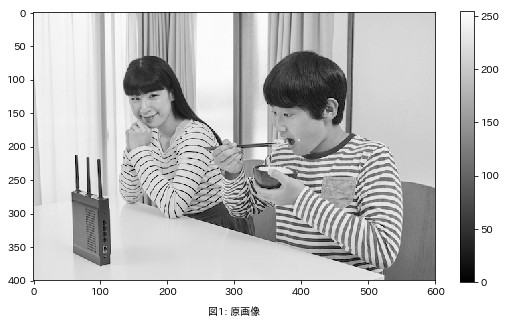

In [1]:
# 環境準備
%run -i prelude.ipynb

# 画像を読み込む
original = PIL.Image.open(IMAGE1_PATH)

# グレースケールに変換
original = np.array(original.convert(mode='L'))

# 表示
def imshow(img, vmax, title):
    fig, ax = plt.subplots(figsize=(9, 5))
    m = ax.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    fig.colorbar(m)
    ax.text(0.5, -0.1, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, 255, '図1: 原画像')

In [2]:
# 濃度値の最小と最大を調べる
print('濃度値の最小:', np.min(original))
print('濃度値の最大:', np.max(original))

濃度値の最小: 0
濃度値の最大: 254


まず、この画像を2階調にすることを考える。原画像は、0から255（実際に画像に含まれている濃度値の最大は254）の256階調で表されていることから、これを0から127と、128から255に分ければ良い。この方法で2階調へ変換を行った結果を、図2に示す。

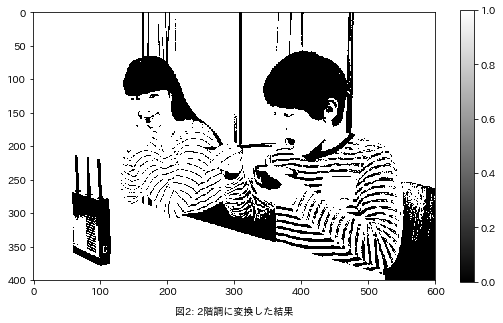

In [3]:
# 原画像の濃度値を、0から127なら0、128から255なら1に変換する
img_2levels = original >= 128

# 表示
imshow(img_2levels, 1, '図2: 2階調に変換した結果')

同様に、4階調の画像を作成することを考える。256階調を4つに分けると、原画像の濃度値の範囲を64ずつ区切れば良いと考えられる。そこで、0から63、64から127、128から191、192から255に区切る。

これをプログラムで表すと、次の手順で行うことができる。

1. 出力画像のすべての画素を0とする。
2. 原画像の濃度値が64以上の画素に対応する、出力画像の画素の濃度値を +1
3. 原画像の濃度値が128以上の画素に対応する、出力画像の画素の濃度値を +1
4. 原画像の濃度値が192以上の画素に対応する、出力画像の画素の濃度値を +1

このようにすることで、濃度値の値域 $[0, 3]$ の4階調画像を生成することができる。この方法で生成した画像を図2に示す。

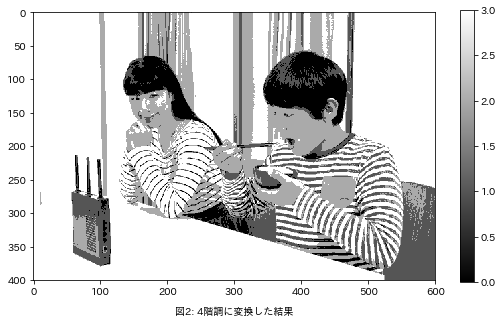

In [4]:
# 各画素が基準値以上かどうかを調べる
# astype によって数値に変換することで、基準値未満ならば0、基準値以上ならば1になる
img_4levels_1 = (original >= 64).astype(np.uint8)
img_4levels_2 = (original >= 128).astype(np.uint8)
img_4levels_3 = (original >= 192).astype(np.uint8)

# 結果を足し合わせる
img_4levels = img_4levels_1 + img_4levels_2 + img_4levels_3

# 表示
imshow(img_4levels, 3, '図2: 4階調に変換した結果')

この方法を一般化して、何階調への変換にも利用できるようにする。n階調へ変換するならば、次の手順で行うことができる。

1. 原画像の濃度値の値域を$n$個に区切る。区切り目の値を $s_i \: (1 \le i \le n-1)$ とする。例えば、原画像が256階調で、 $n=4$ ならば、 $s_1=64, s_2=128, s_3=192$ である。
2. 出力画像のすべての画素を0とする。
3. すべての $i$ について、次の手順を行う。
    1. すべての画素について、原画像の画素の濃度値を $c$ として、次の手順を行う。
        1. $c \ge s_i$ ならば、出力画像の対応する画素の濃度を +1

この手順で、値域 $[0, n-1]$ のn階調画像が得られる。この処理を、関数 conv_level として、プログラムに表す。

In [5]:
def conv_level(img, n):
    # すべてゼロの画像を作成
    new_img = np.zeros(img.shape, dtype=np.uint)
    
    # 区切り目を求める
    # 入力画像は256階調であることを想定する
    split_points = np.linspace(0, 256, n, endpoint=False)[1:]
    print("区切り目:", split_points)
    
    # 区切り目の値ごとにループ
    for s in split_points:
        # 原画像の画素の濃度がs以上の画素についてインクリメント
        new_img += (img >= s).astype(np.uint8)
        
    return new_img

この関数を用いて、8階調の画像を生成した結果を図3に示す。

区切り目: [ 32.  64.  96. 128. 160. 192. 224.]


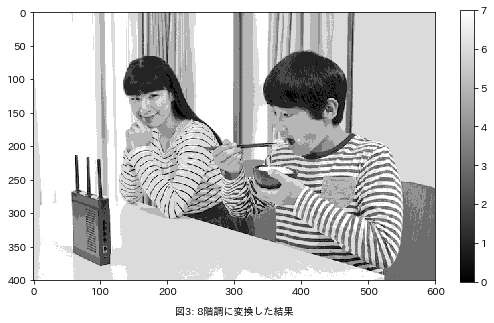

In [6]:
img_8levels = conv_level(original, 8)
imshow(img_8levels, 7, '図3: 8階調に変換した結果')

2階調（図1）では、顔とカーテンの境目がわからないほど、情報が失われていた。一方、4階調（図2）、8階調（図3）では、1つの顔の中にもかかわらず、濃度の段差ができている、疑似輪郭が発生している。